In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from matplotlib import style 
style.use("dark_background")
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset


In [5]:
data=pd.read_csv("AI_Resume_Screening_Processed_Full.csv")
data.head()

,Experience (Years),Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100),Edu_B.Sc,Edu_B.Tech,Edu_M.Tech,Edu_MBA,Edu_PhD,...,Skill_sql,Skill_tensorflow,Cert_aws,Cert_certified,Cert_deep,Cert_google,Cert_learning,Cert_ml,Cert_nan,Cert_specialization
0,10,1,104895,8,100,1,0,0,0,0,...,0.000000,0.567727,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.0,0.00000
1,10,1,113002,1,100,0,0,0,1,0,...,0.296401,0.000000,0.000000,0.000000,0.00000,0.707107,0.00000,0.707107,0.0,0.00000
2,1,1,71766,7,70,0,0,0,1,0,...,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,0.57735,0.000000,0.0,0.57735
3,7,1,46848,0,95,0,1,0,0,0,...,0.000000,0.616429,0.707107,0.707107,0.00000,0.000000,0.00000,0.000000,0.0,0.00000
4,4,1,87441,9,100,0,0,0,0,1,...,0.458269,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.0,0.00000


In [7]:
data.drop(['Skill_ethical', 'Skill_hacking'],inplace=True,axis=1)

In [9]:
data.columns

Index(['Experience (Years)', 'Recruiter Decision', 'Salary Expectation ($)',
       'Projects Count', 'AI Score (0-100)', 'Edu_B.Sc', 'Edu_B.Tech',
       'Edu_M.Tech', 'Edu_MBA', 'Edu_PhD', 'Job_AI Researcher',
       'Job_Cybersecurity Analyst', 'Job_Data Scientist',
       'Job_Software Engineer', 'Skill_cybersecurity', 'Skill_deep',
       'Skill_java', 'Skill_learning', 'Skill_linux', 'Skill_machine',
       'Skill_networking', 'Skill_nlp', 'Skill_python', 'Skill_pytorch',
       'Skill_react', 'Skill_sql', 'Skill_tensorflow', 'Cert_aws',
       'Cert_certified', 'Cert_deep', 'Cert_google', 'Cert_learning',
       'Cert_ml', 'Cert_nan', 'Cert_specialization'],
      dtype='object')

In [11]:
x=np.array(data.drop("Recruiter Decision",axis=1))

In [13]:
x

array([[1.00000000e+01, 1.04895000e+05, 8.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+01, 1.13002000e+05, 1.00000000e+00, ...,
        7.07106781e-01, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 7.17660000e+04, 7.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.77350269e-01],
       ...,
       [0.00000000e+00, 1.13855000e+05, 9.00000000e+00, ...,
        7.07106781e-01, 0.00000000e+00, 0.00000000e+00],
       [8.00000000e+00, 8.31460000e+04, 1.00000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.00000000e+00, 1.19474000e+05, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.77350269e-01]])

In [15]:
x.shape

(1000, 34)

In [17]:
y=data.iloc[:,1].values

In [19]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [21]:
y.shape

(1000,)

In [25]:
#splitting the data into training and testing part

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
#standardizing the trainin and testing data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [27]:
X_train.shape

(800, 34)

In [29]:
y_train.shape

(800,)

In [31]:
#converting the traing and testing data to tensor data

In [33]:
X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
X_test_tensor=torch.tensor(X_test,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train,dtype=torch.long)
y_test_tensor=torch.tensor(y_test,dtype=torch.long)

#converting the above data to tensorDataset

train_data=TensorDataset(X_train_tensor,y_train_tensor)
test_data=TensorDataset(X_test_tensor,y_test_tensor)

#crreating the batches and dataloader

batch_size=32
train_data_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True,drop_last=True)
test_data_loader=DataLoader(test_data,batch_size=batch_size,drop_last=True)


In [35]:
for x,y in train_data_loader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([32, 34])
torch.Size([32])


In [37]:
#creating an ann

In [39]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.input=nn.Linear(34,64)
        self.l1=nn.Linear(64,128)
        self.l2=nn.Linear(128,256)
        self.l3=nn.Linear(256,256)
        self.l4=nn.Linear(256,128)
        self.l5=nn.Linear(128,64)
        self.l6=nn.Linear(64,32)
        self.l7=nn.Linear(32,16)
        self.output=nn.Linear(16,2)

    def forward(self,x):
        x=F.relu(self.input(x))
        x=F.relu(self.l1(x))
        x=F.relu(self.l2(x))
        x=F.relu(self.l3(x))
        x=F.relu(self.l4(x))
        x=F.relu(self.l5(x))
        x=F.relu(self.l6(x))
        x=F.relu(self.l7(x))
        return self.output(x)
                 
                 
                 
        
        
        

In [41]:
model=MyModel()

In [43]:
model

MyModel(
  (input): Linear(in_features=34, out_features=64, bias=True)
  (l1): Linear(in_features=64, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=256, bias=True)
  (l3): Linear(in_features=256, out_features=256, bias=True)
  (l4): Linear(in_features=256, out_features=128, bias=True)
  (l5): Linear(in_features=128, out_features=64, bias=True)
  (l6): Linear(in_features=64, out_features=32, bias=True)
  (l7): Linear(in_features=32, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=2, bias=True)
)

In [45]:
#training and testing the model

In [47]:
lossfunc=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),momentum=0.9,lr=0.01)
epochs=1001
losses=torch.zeros(epochs)
train_acc=[]
test_acc=[]
for epoch in range(epochs):
    model.train()
    batch_loss=[]
    batch_acc=[]
    for x,y in train_data_loader:
        y_pred=model(x)
        loss=lossfunc(y_pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.item())
        acc=torch.mean((torch.argmax(y_pred,dim=1)==y).float())*100
        batch_acc.append(acc)

    train_acc.append(np.mean(batch_acc))
    losses[epoch]=np.mean(batch_loss)
    #testing 
    model.eval()
    with torch.no_grad():
        for x,y in test_data_loader:
            y_pred_test=model(x)

    test_acc.append(torch.mean((torch.argmax(y_pred_test,dim=1)==y).float())*100)
    if epoch%100==0:
        print(f"epoch:{epoch}  loss:{loss:.2f}")
    
        
    
    

epoch:0  loss:0.49
epoch:100  loss:0.00
epoch:200  loss:0.00
epoch:300  loss:0.00
epoch:400  loss:0.00
epoch:500  loss:0.00
epoch:600  loss:0.00
epoch:700  loss:0.00
epoch:800  loss:0.00
epoch:900  loss:0.00
epoch:1000  loss:0.00


In [49]:
#ploting the model acc

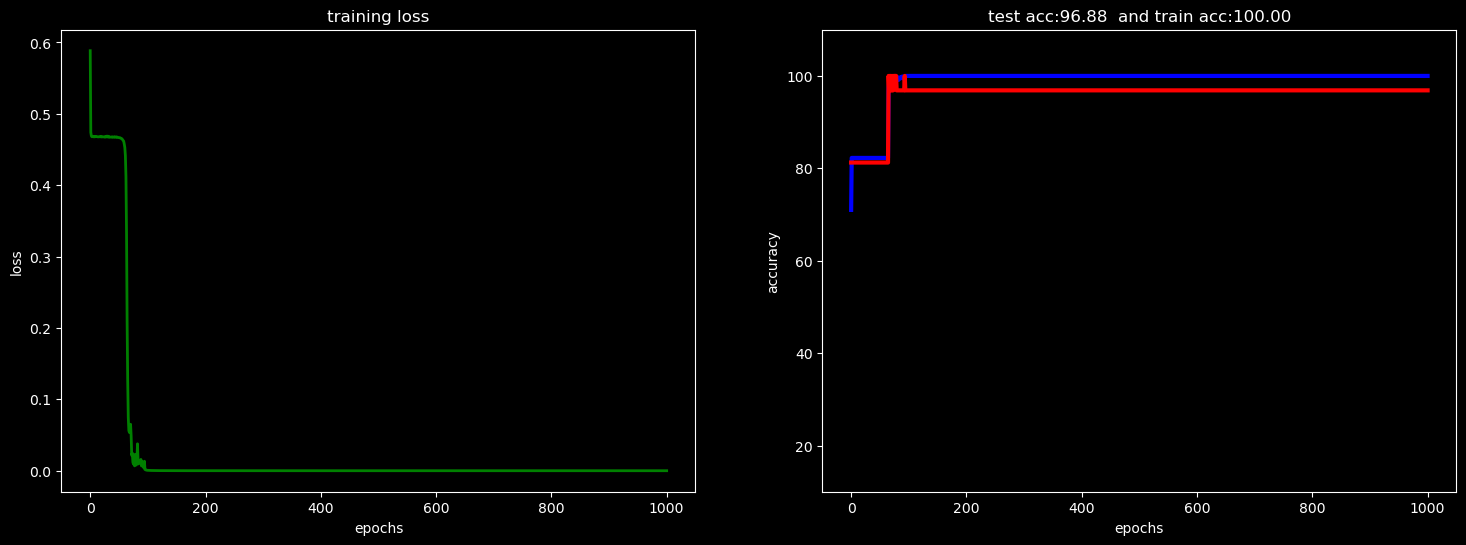

In [50]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
ax[0].plot(losses,'g',lw=2,label='train')
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("loss")
ax[1].set_ylim(0,1)
ax[0].set_title("training loss")

ax[1].plot(train_acc,'b',lw=3,label="trainacc")
ax[1].plot(test_acc,'r',lw=3,label="testacc")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("accuracy")
ax[1].set_ylim(10,110)
ax[1].set_title(f"test acc:{test_acc[-1]:2.2f}  and train acc:{train_acc[-1]:2.2f}")

plt.show()

In [51]:
#saving the model
import torch

# Save the model state_dict
torch.save(model.state_dict(), "ann_model.pth")
print("Model saved successfully!")

Model saved successfully!


In [52]:
#this model has corrently achieved around of 96.88% accuracy

In [53]:
#############################################################################################################################################

In [54]:
#logestic rigression
from sklearn.linear_model import LogisticRegression
model_logestic=LogisticRegression()
model_logestic.fit(X_train,y_train)
y_pred_logestic=model_logestic.predict(X_test)

In [55]:
#evaluationg the logistic regression
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_logestic))

0.99


In [56]:
#save the logistic regression model
import joblib
joblib.dump(model_logestic, "logreg_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [57]:
#lets make the confusion metrics to evaluate

In [3]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,ConfusionMatrixDisplay
cmx=confusion_matrix(y_test,y_pred_logestic)
cmx

NameError: name 'y_test' is not defined

In [5]:
#Poting of condisp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp=ConfusionMatrixDisplay(confusion_matrix=cmx,display_labels=[0,1])
disp.plot(xticks_rotation=0)
fig=disp.ax_.get_figure()
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()


NameError: name 'cmx' is not defined

In [60]:
#evaluation gthe recall score and other evaluation parameters

In [61]:
prescision_scr=precision_score(y_test,y_pred_logestic)
recall_src=recall_score(y_test,y_pred_logestic)
f1_src=f1_score(y_test,y_pred_logestic)

print(f'precision_score:{(prescision_scr*100).round(2)}')
print(f'recall_score:{(recall_src*100).round(2)}')
print(f'f1_score:{(f1_src*100).round(2)}')

precision_score:99.35
recall_score:99.35
f1_score:99.35


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logestic))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.99      0.99      0.99       154

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



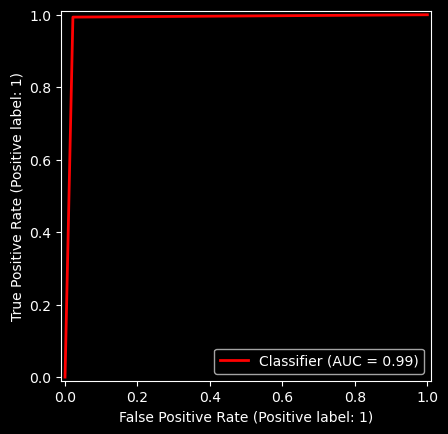

In [63]:
#display the roc curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,y_pred_logestic,drop_intermediate=False,lw=2,color='r')
plt.show()

In [64]:
#############################################################################################################################################

In [65]:
#svm
from sklearn.svm import SVC
svc=SVC(kernel='rbf',C=1,gamma='scale')
svc.fit(X_train,y_train)

SVC(C=1)

In [66]:
y_p=svc.predict(X_test)

In [67]:
#evaluation of the model

In [68]:
acc=np.mean(y_p==y_test)*100

In [69]:
acc

97.0

In [70]:
import joblib
joblib.dump(svc, "svm_model.pkl")
print("SVM model saved successfully!")


SVM model saved successfully!


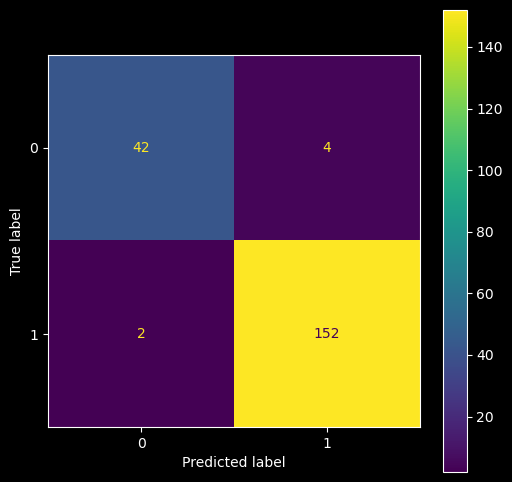

In [71]:
#confusion matric and evaluation
cmx=confusion_matrix(y_test,y_p)
cmx
disp=ConfusionMatrixDisplay(confusion_matrix=cmx,display_labels=[0,1])
disp.plot(xticks_rotation=0)
fig=disp.ax_.get_figure()
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

In [72]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_p,y_test,normalize=True)
p=precision_score(y_p,y_test,average='macro')
r=recall_score(y_p,y_test,average='macro')
f1=f1_score(y_p,y_test,average='macro')
print(f'accuracy:{ac}')
print(f'precision-score:{p}')
print(f'recall-score:{r}')
print(f'f1-score:{f1}')


accuracy:0.97
precision-score:0.9500282326369283
recall-score:0.9644522144522145
f1-score:0.956989247311828


In [73]:
#classifictaion report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        46
           1       0.97      0.99      0.98       154

    accuracy                           0.97       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.97      0.97      0.97       200



In [74]:
#using crossvalidation for logistic
from sklearn.model_selection import cross_val_predict,cross_val_score,KFold
k=5
cv=KFold(n_splits=k,random_state=42,shuffle=True)
model_cv=LogisticRegression()
y_pred_cv=cross_val_predict(model_cv,X_test,y_test,cv=cv)


In [75]:
acc=np.mean(y_pred_cv==y_test)*100

In [76]:
acc

96.5

In [77]:
ac=accuracy_score(y_pred_cv,y_test,normalize=True)
p=precision_score(y_pred_cv,y_test,average='macro')
r=recall_score(y_pred_cv,y_test,average='macro')
f1=f1_score(y_pred_cv,y_test,average='macro')
print(f'accuracy:{ac}')
print(f'precision-score:{p}')
print(f'recall-score:{r}')
print(f'f1-score:{f1}')

accuracy:0.965
precision-score:0.9620271033314511
recall-score:0.9423570752804433
f1-score:0.9516824849007766


In [78]:
##############################################################################################################################################

In [79]:
from sklearn.tree import DecisionTreeClassifier
mod_desicion=DecisionTreeClassifier()
#cross validation
from sklearn.model_selection import cross_val_predict,cross_val_score,KFold
k=5
cv=KFold(n_splits=k,random_state=42,shuffle=True)
mod_desicion.fit(X_train,y_train)

y_pred_decision=cross_val_predict(mod_desicion,X_test,y_test,cv=cv)

In [80]:
acc=np.mean(y_pred_decision==y_test)*100

In [81]:
acc

100.0

In [82]:
import joblib
joblib.dump(mod_desicion, "decision_tree.pkl")
print("Decision Tree model saved successfully!")

Decision Tree model saved successfully!


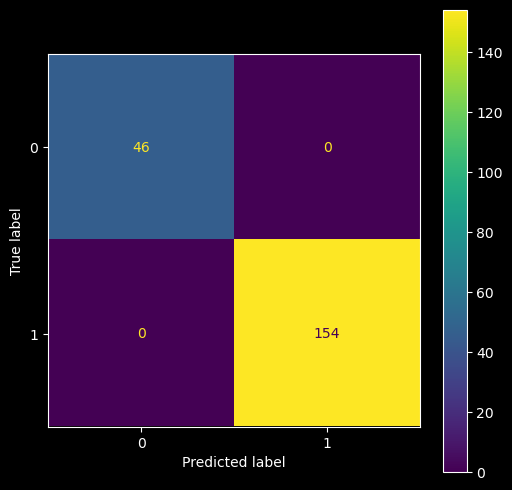

In [83]:
cmx_decision=confusion_matrix(y_test,y_pred_decision)
cmx_decision
disp=ConfusionMatrixDisplay(confusion_matrix=cmx_decision,display_labels=[0,1])
disp.plot(xticks_rotation=0)
fig=disp.ax_.get_figure()
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

In [84]:
ac=accuracy_score(y_pred_decision,y_test,normalize=True)
p=precision_score(y_pred_decision,y_test,average='macro')
r=recall_score(y_pred_decision,y_test,average='macro')
f1=f1_score(y_pred_decision,y_test,average='macro')
print(f'accuracy:{ac}')
print(f'precision-score:{p}')
print(f'recall-score:{r}')
print(f'f1-score:{f1}')

accuracy:1.0
precision-score:1.0
recall-score:1.0
f1-score:1.0


In [85]:
############################################################################################################################################3

In [86]:
#adaboost classifier

In [87]:
from sklearn.ensemble import AdaBoostClassifier
mod_ada=AdaBoostClassifier()
k=5
cv=KFold(n_splits=k,random_state=42,shuffle=True)
mod_ada.fit(X_train,y_train)

y_pred_ada=cross_val_predict(mod_ada,X_test,y_test,cv=cv)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

In [88]:
joblib.dump(mod_ada, "adaboost_model.pkl")
print("AdaBoost model saved successfully!")

AdaBoost model saved successfully!


In [89]:
acc_ada=np.mean(y_pred_ada==y_test)*100

In [90]:
acc_ada

100.0

In [91]:
ac=accuracy_score(y_pred_ada,y_test,normalize=True)
p=precision_score(y_pred_ada,y_test,average='macro')
r=recall_score(y_pred_ada,y_test,average='macro')
f1=f1_score(y_pred_ada,y_test,average='macro')
print(f'accuracy:{ac}')
print(f'precision-score:{p}')
print(f'recall-score:{r}')
print(f'f1-score:{f1}')

accuracy:1.0
precision-score:1.0
recall-score:1.0
f1-score:1.0
